# Analyze Product Sentiment

In [1]:
import turicreate

# Read product review data

In [2]:
products = turicreate.SFrame('amazon_baby.sframe')

# Explore data

In [3]:
products

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [4]:
products.groupby('name',operations={'count':turicreate.aggregate.COUNT()}).sort('count',ascending=False)

name,count
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


# Examine the reivews for the most-reviewed product

In [8]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [9]:
giraffe_reviews

name,review,rating,word_count
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ..."
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ..."
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ..."
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ..."
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ..."
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'off': 1.0, 'have': 2.0,'of': 1.0, 'some': 1.0, ..."


In [10]:
len(giraffe_reviews)

785

In [11]:
giraffe_reviews['rating'].show()

Materializing SArray

# Building a sentiment classifier

## Build word count vectors

In [4]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [5]:
products

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


# Define what is positive and negative sentiment

In [12]:
products['rating'].show()

Materializing SArray

In [18]:
#ignore all 3*  reviews
products = products[products['rating']!= 3]

In [19]:
#positive sentiment = 4-star or 5-star reviews
products['sentiment'] = products['rating'] >= 4

In [20]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1


In [21]:
products['sentiment'].show()

Materializing SArray

# Train our sentiment classifier

In [23]:
train_data,test_data = products.random_split(.8,seed=0)

In [25]:
sentiment_model = turicreate.logistic_classifier.create(train_data,target='sentiment', features=['word_count'], validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.139659     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 0.322565     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 0.409415     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 0.469455     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 0.562099     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 0.904345     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [44]:
evaluation = sentiment_model.evaluate(test_data, metric='roc_curve')

In [53]:
sentiment_model.validation_confusion_matrix

class,predicted_class,count
0,0,3931
0,1,1397
1,0,1344
1,1,26632


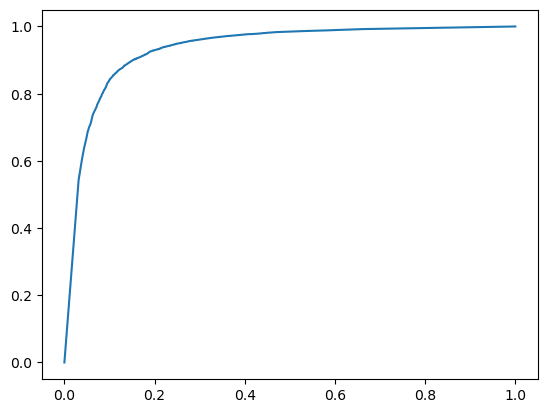

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(evaluation['roc_curve']['fpr'],evaluation['roc_curve']['tpr'])

# Apply the sentiment classifier to better understand the Giraffe reviews

In [54]:
products['predicted_sentiment'] = sentiment_model.predict(products, output_type = 'probability')

In [55]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1


In [56]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [57]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",1
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",1
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",1
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",1
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",1
Vulli Sophie the GiraffeTeether ...,This product is without adoubt the best on the ...,5.0,"{'belongs': 1.0, 'dog':1.0, 'if': 1.0, 'bewa ...",1


# Sort the Giraffe reviews according to predicted sentiment

In [58]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [23]:
giraffe_reviews

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'giggles': 1, 'all': 1,""violet's"": 2, 'bring': ...",1
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'adoring': 1, 'find': 1,'month': 1, 'bright': 1, ...",1
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'all': 2, 'discovered':1, 'existence.': 1, ...",1
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'all': 2, ""don't"": 1,'(literally).so': 1, ...",1
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'cute': 1, 'all': 1,'reviews.': 2, 'just' ...",1
Vulli Sophie the GiraffeTeether ...,Sophie the Giraffe is theperfect teething toy. ...,5.0,"{'just': 2, 'both': 1,'month': 1, 'ears,': 1, ...",1
Vulli Sophie the GiraffeTeether ...,Sophie la giraffe isabsolutely the best toy ...,5.0,"{'and': 5, 'the': 1,'all': 1, 'that': 2, ...",1
Vulli Sophie the GiraffeTeether ...,My 5-mos old son took tothis immediately. The ...,5.0,"{'just': 1, 'shape': 2,'mutt': 1, '""dog': 1, ...",1
Vulli Sophie the GiraffeTeether ...,My nephews and my fourkids all had Sophie in ...,5.0,"{'and': 4, 'chew': 1,'all': 1, 'perfect;': 1, ...",1
Vulli Sophie the GiraffeTeether ...,Never thought I'd see myson French kissing a ...,5.0,"{'giggles': 1, 'all': 1,'out,': 1, 'over': 1, ...",1


In [24]:
giraffe_reviews.tail()

name,review,rating,word_count,sentiment
Vulli Sophie the GiraffeTeether ...,I bought it for my 8month old (I know it's ...,2.0,"{'and': 5, 'enjoy': 1,'right': 1, 'old': 1, ...",0
Vulli Sophie the GiraffeTeether ...,When we first got it Ithought did my ...,2.0,"{'and': 2, 'cute': 1,'all': 1, 'because': 1, ...",0
Vulli Sophie the GiraffeTeether ...,After getting this for mybaby and after she su ...,1.0,"{'just': 1, 'being': 1,'over': 1, 'chalked': 1, ...",0
Vulli Sophie the GiraffeTeether ...,"My daughter loves Sophie,but we received her as a ...",2.0,"{'and': 2, 'the': 3,""don't"": 1, 'doing': 1, ...",0
Vulli Sophie the GiraffeTeether ...,"""Sophie the Giraffe"" hastested positive for ...",1.0,"{'saying': 1,'nitrosamines.': 1, ...",0
Vulli Sophie the GiraffeTeether ...,I received this in a boxset as a gift. It came ...,2.0,"{'cute': 1, 'unhooked':1, 'being': 2, 'stora ...",0
Vulli Sophie the GiraffeTeether ...,I was intrigued with theidea of Sophie the ...,2.0,"{'baby.)': 1, 'all': 2,'able': 1, 'month': 1, ...",0
Vulli Sophie the GiraffeTeether ...,I wanted to love thisproduct and was excited ...,1.0,"{'just': 1, 'may,': 1,'children': 1, 'bummed': ...",0
Vulli Sophie the GiraffeTeether ...,This children's toy isnostalgic and very cute. ...,1.0,"{'expectations.': 1,'refund': 1, 'there': 1, ...",0
Vulli Sophie the GiraffeTeether ...,"My son (now 2.5) LOVEDhis Sophie, and I bought ...",1.0,"{'all': 1, 'just': 1,""don't"": 1, 'over': 2, ...",0


## Show the most positive reviews

In [25]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [26]:
giraffe_reviews[1]['review']

"I'm not sure why Sophie is such a hit with the little ones, but my 7 month old baby girl is one of her adoring fans.  The rubber is softer and more pleasant to handle, and my daughter has enjoyed chewing on her legs and the nubs on her head even before she started teething.  She also loves the squeak that Sophie makes when you squeeze her.  Not sure what it is but if Sophie is amongst a pile of her other toys, my daughter will more often than not reach for Sophie.  And I have the peace of mind of knowing that only edible and safe paints and materials have been used to make Sophie, as opposed to Bright Starts and other baby toys made in China.  Now that the research is out on phthalates and other toxic substances in baby toys, I think it's more important than ever to find good quality toys that are also safe for our babies to handle and put in their mouths.  Sophie is a must-have for every new mom in my opinion.  Even if your kid is one of the few that can take or leave her, it's worth

# Most negative reivews

In [59]:
giraffe_reviews[-1]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [60]:
giraffe_reviews[-2]['review']

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

In [61]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [74]:
def words(word, wc):
    if word in wc:
        return wc[word]
    else:
        return 0

In [75]:
for i in selected_words:
    products[i] = products['word_count'].apply(lambda wc: words(i, wc))

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 32)"

Note that increasing the degree of parallelism also increases the memory footprint.

In [94]:
products

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",1


In [101]:
total = 0
name = None
for i in selected_words:
    selected_total = products[i].sum()
    if selected_total > total:
        name = i
        total = selected_total
print(name)

great


In [102]:
total = 1000000
name = None
for i in selected_words:
    selected_total = products[i].sum()
    if selected_total < total:
        name = i
        total = selected_total
print(name)
print (total)

wow
425


In [77]:
train_data,test_data = products.random_split(.8, seed=0)

In [79]:
selected_words_model = turicreate.logistic_classifier.create(train_data, target='sentiment', features=selected_words,validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.012799     | 0.847401          | 0.845874            |

| 2         | 3        | 0.029582     | 0.847514          | 0.846085            |

| 3         | 4        | 0.046306     | 0.847626          | 0.846115            |

| 4         | 5        | 0.067291     | 0.847708          | 0.846385            |

| 5         | 6        | 0.085829     | 0.847708          | 0.846385            |

| 6         | 7        | 0.106215     | 0.847708          | 0.846385            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [81]:
selected_words_model

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 12
Number of examples             : 133448
Number of classes              : 2
Number of feature columns      : 11
Number of unpacked features    : 11

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 6
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.1183

Settings
--------
Log-likelihood                 : 52926.808

Highest Positive Coefficients
-----------------------------
love                           : 1.3593
(intercept)                    : 1.3366
awesome                        : 1.1335
amazing                        : 1.1001
fantastic                      : 0.8858

Lowest Negative Coefficients
----------------------------
horrible                       : -2.2513
ter

In [105]:
selected_words_model.coefficients.sort('value').print_rows(12)

+-------------+-------+-------+-----------------------+----------------------+
|     name    | index | class |         value         |        stderr        |
+-------------+-------+-------+-----------------------+----------------------+
|   horrible  |  None |   1   |  -2.2513352367590986  | 0.08020249388788438  |
|   terrible  |  None |   1   |  -2.2236614360851323  | 0.07731736203785755  |
|    awful    |  None |   1   |   -2.052908204031357  | 0.10099735435259254  |
|     hate    |  None |   1   |  -1.3484407222463173  | 0.07715698604297334  |
|     bad     |  None |   1   |  -0.9914778800650625  | 0.03848428664699068  |
|     wow     |  None |   1   | -0.009538236067684629 | 0.16046411224711657  |
|    great    |  None |   1   |   0.8630655001196574  | 0.01895505244437721  |
|  fantastic  |  None |   1   |   0.8858047568814237  | 0.11167591293399677  |
|   amazing   |  None |   1   |   1.1000933113660223  | 0.09954776260465992  |
|   awesome   |  None |   1   |   1.1335346660341379

In [84]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.8463848186404036,
 'auc': 0.6935096220934976,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  159  |
 |      0       |        0        |  371  |
 |      0       |        1        |  4957 |
 |      1       |        1        | 27817 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9157860082304526,
 'log_loss': 0.39622654670874996,
 'precision': 0.8487520595594068,
 'recall': 0.9943165570488991,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328

In [85]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9176975738650012,
 'auc': 0.9258242975424673,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      1       |        0        |  1344 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.3304787187239293,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0  

In [86]:
average = products['sentiment'].mean()

In [87]:
average

0.8411233448474378

In [88]:
diaper_champ_reviews = products[products['name']== 'Baby Trend Diaper Champ']

In [89]:
diaper_champ_reviews = diaper_champ_reviews.sort('predicted_sentiment', ascending=False)

In [91]:
diaper_champ_reviews[0]['predicted_sentiment']

0.9999999999895941

In [92]:
selected_words_model.predict(diaper_champ_reviews[0:1], output_type='probability')

dtype: float
Rows: 1
[0.7919288370624469]

In [93]:
diaper_champ_reviews[0]

{'name': 'Baby Trend Diaper Champ',
 'review': "I read a review below that can explain exactly what we experienced. We've had it for 16 months and it has worked wonderful for us. No smells, change it out once a week, easy to clean. Then a diaper snagged this foam material in the head part, so I pulled the rest of the foam out. Big mistake!!! Now it can no loner retain the stinkiness and we're looking for a replacement. Be careful of overloading and never take out that foam piece that is cushioned between pieces. I have figured out that it is key to keeping the stink out.",
 'rating': 4.0,
 'word_count': {'key': 1.0,
  'have': 1.0,
  'pieces': 1.0,
  'between': 1.0,
  'cushioned': 1.0,
  'piece': 1.0,
  'take': 1.0,
  'overloading': 1.0,
  'be': 1.0,
  'looking': 1.0,
  're': 1.0,
  'stinkiness': 1.0,
  'retain': 1.0,
  'now': 1.0,
  'wonderful': 1.0,
  'worked': 1.0,
  '16': 1.0,
  'and': 3.0,
  'months': 1.0,
  've': 1.0,
  'in': 1.0,
  'us': 1.0,
  'i': 3.0,
  'experienced': 1.0,
  '